In [70]:
import pandas as pd
import pyarrow
from Network_Similarity_Viz import create_similarity_plot

df = pd.read_parquet('merged_jaccard_similarity.parquet')


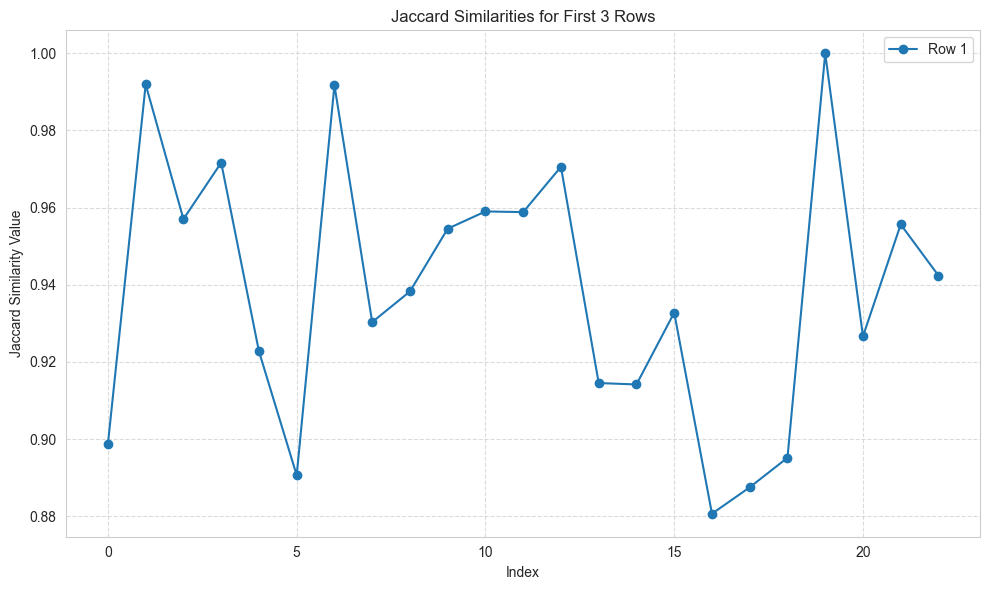

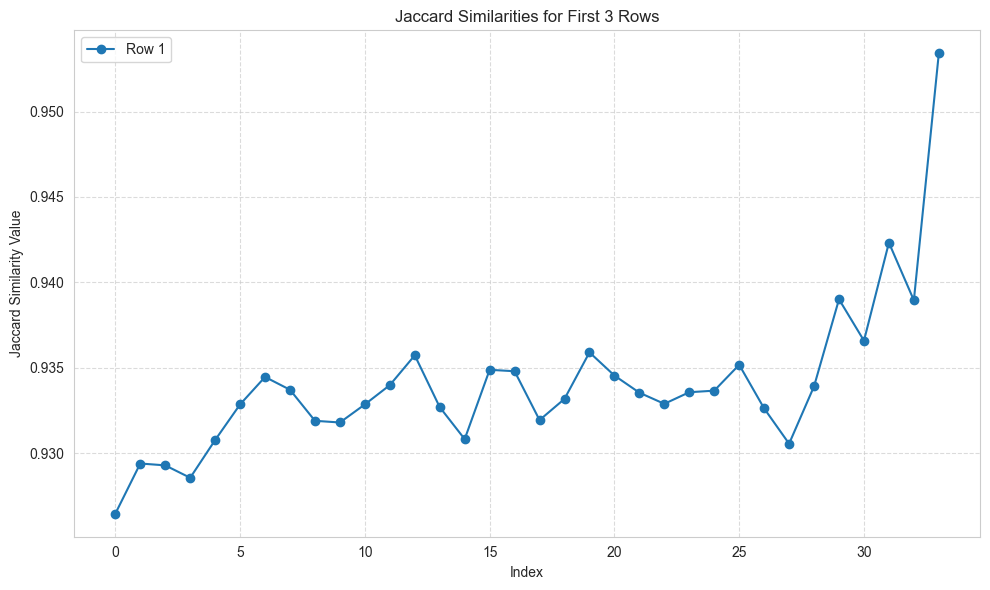

In [71]:
import numpy as np
import seaborn as sns

# Find the maximum length of lists in 'jaccard_similarities'
max_len = df['jaccard_similarities'].apply(len).max()

# Pad lists with np.nan to make them the same length
padded_sim = df['jaccard_similarities'].apply(lambda x: list(x) + [np.nan] * (max_len - len(x)))
arr = np.array(padded_sim.tolist(), dtype=float)

# Compute the mean for each index, ignoring nan
similarity_sample = [list(df['jaccard_similarities'].sample(1,random_state=1).values[0])]
avg_similarities = [list(np.nanmean(arr, axis=0))]
# Use the create_similarity_plot function
create_similarity_plot(similarity_sample)
create_similarity_plot(avg_similarities)


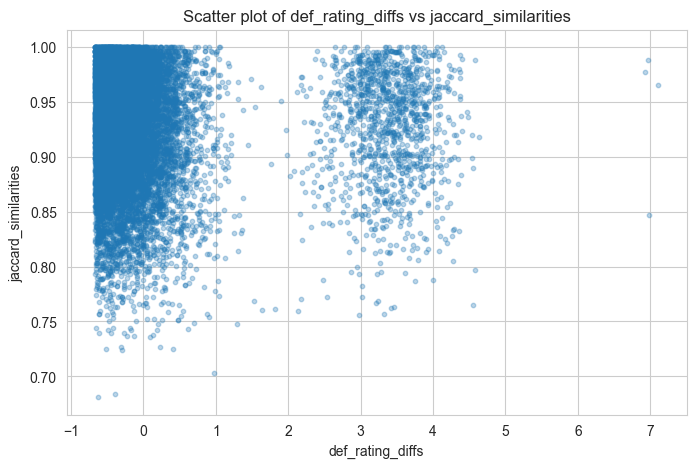

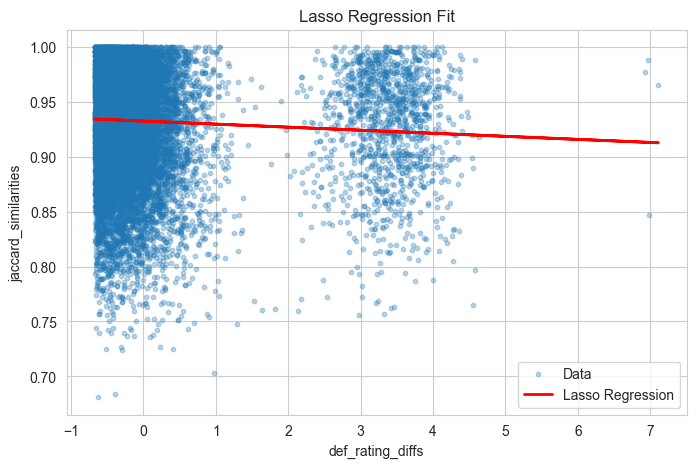

In [ ]:
from sklearn.linear_model import Lasso
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Flatten all values from the lists in the DataFrame
all_jaccard = [val for sublist in df['jaccard_similarities'] for val in sublist]
all_def_diff = [val for sublist in df['def_rating_diffs'] for val in sublist]

# Remove pairs where either value is nan
x_vals = []
y_vals = []
for x, y in zip(all_def_diff, all_jaccard):
    if not (np.isnan(x) or np.isnan(y)):
        x_vals.append(abs(x))
        y_vals.append(y)

x_arr = np.array(x_vals).reshape(-1, 1)
y_arr = np.array(y_vals)

# Scale the x values
scaler = StandardScaler()
x_arr = scaler.fit_transform(x_arr)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(x_arr, y_arr, alpha=0.3, s=10)
plt.xlabel('def_rating_diffs')
plt.ylabel('jaccard_similarities')
plt.title('Scatter plot of def_rating_diffs vs jaccard_similarities')
plt.show()
reg = LinearRegression()
reg.fit(x_arr, y_arr)
y_pred = reg.predict(x_arr)

plt.figure(figsize=(8, 5))
plt.scatter(x_arr, y_arr, alpha=0.3, s=10, label='Data')
plt.plot(x_arr, y_pred, color='red', linewidth=2, label='Lasso Regression')
plt.xlabel('def_rating_diffs')
plt.ylabel('jaccard_similarities')
plt.title('Lasso Regression Fit')
plt.legend()
plt.show()

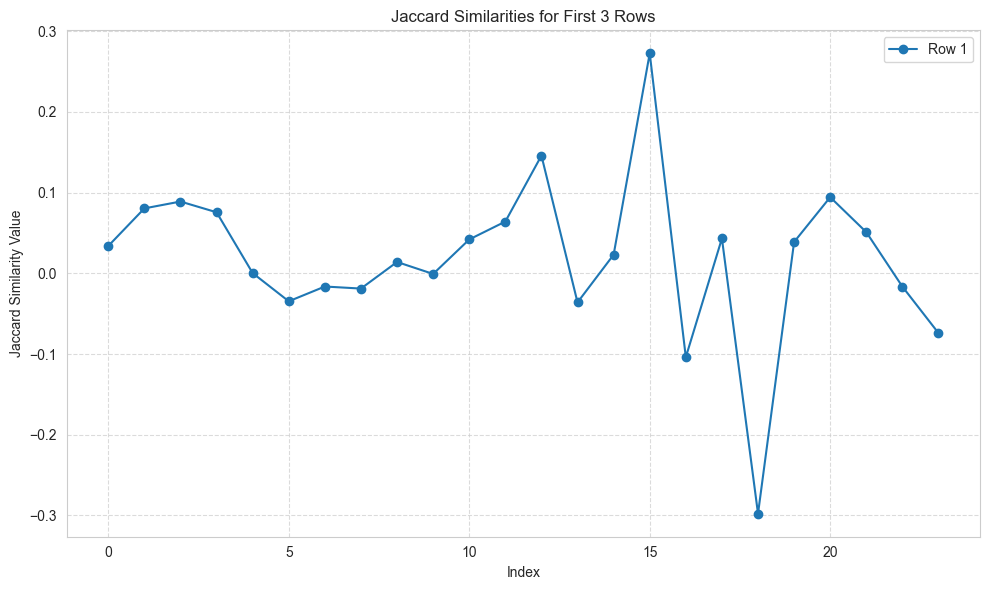

C:\Users\adabi\AppData\Local\Temp\ipykernel_31320\3512358061.py:26: RuntimeWarning: Mean of empty slice
  avg_residuals = np.nanmean(arr_residuals, axis=0)


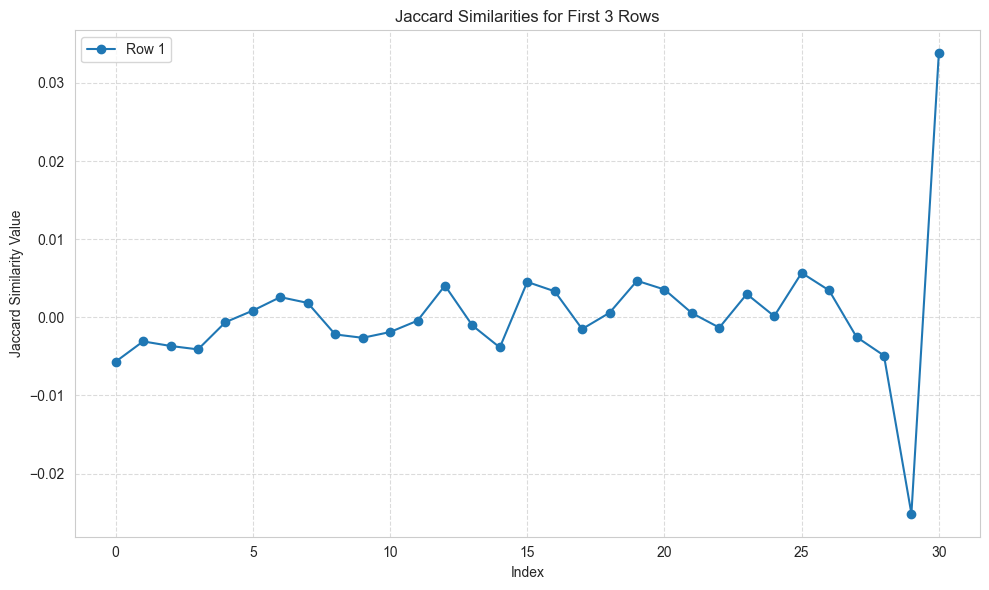

In [77]:
# Compute predicted values using the linear regression model
y_pred = reg.predict(np.array(all_def_diff).reshape(-1, 1))

# Compute residuals
residuals = np.array(all_jaccard) - y_pred

# Use the same row for both jaccard similarities and def_rating_diffs
sample_idx = df['jaccard_similarities'].sample(1, random_state=48).index[0]
sample_jaccard = df.loc[sample_idx, 'jaccard_similarities']
sample_def_diff = df.loc[sample_idx, 'def_rating_diffs']

# Compute residuals for the sample
sample_pred = reg.predict(np.array(sample_def_diff).reshape(-1, 1))
sample_residuals = list(np.array(sample_jaccard) - sample_pred)
create_similarity_plot([sample_residuals])

# Compute the average residuals for each index, ignoring nan
arr_residuals = np.full_like(arr, np.nan)
for i in range(arr.shape[1]):
	# Get valid (non-nan) indices for this column
	mask = ~np.isnan(arr_def[:arr.shape[0], i]) & ~np.isnan(arr[:, i])
	if np.any(mask):
		pred = reg.predict(arr_def[:arr.shape[0], i][mask].reshape(-1, 1))
		arr_residuals[mask, i] = arr[mask, i] - pred

avg_residuals = np.nanmean(arr_residuals, axis=0)
create_similarity_plot([avg_residuals])